Parth Karande

First Week Internship


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()   # Select your CSV file


Saving AEP_hourly.csv.zip to AEP_hourly.csv.zip


In [ ]:
import zipfile
import io

# open the uploaded zip file
with zipfile.ZipFile("/content/AEP_hourly.csv.zip", 'r') as z:
    z.extractall("/content/")   # extract to content folder
    print(z.namelist())         # show the files inside



['AEP_hourly.csv']


In [ ]:
import pandas as pd

# read the extracted CSV
data = pd.read_csv("/content/AEP_hourly.csv", parse_dates=["Datetime"], index_col="Datetime")

print(data.shape)   # check rows and columns
print(data.head())  # preview first 5 rows


(121273, 1)
                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0


In [ ]:
print(data.isna().sum())



AEP_MW    0
dtype: int64


In [ ]:
import pandas as pd

# Load the dataset (replace filename with your actual CSV)
df = pd.read_csv("AEP_hourly.csv")

# Check first few rows
print(df.head())



              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0


In [ ]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set datetime as index
df = df.set_index('Datetime')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None
                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0


In [ ]:
df = df.reset_index()

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

print(df.head())



             Datetime   AEP_MW  year  month  day  hour  dayofweek  is_weekend
0 2004-12-31 01:00:00  13478.0  2004     12   31     1          4           0
1 2004-12-31 02:00:00  12865.0  2004     12   31     2          4           0
2 2004-12-31 03:00:00  12577.0  2004     12   31     3          4           0
3 2004-12-31 04:00:00  12517.0  2004     12   31     4          4           0
4 2004-12-31 05:00:00  12670.0  2004     12   31     5          4           0


In [ ]:
# Ensure data is sorted by datetime
df = df.sort_values("Datetime")

# Define split index (80% train, 20% test)
split_index = int(len(df) * 0.8)

# Split
train = df.iloc[:split_index]
test = df.iloc[split_index:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (97018, 8)
Test shape: (24255, 8)


In [ ]:
# Features (without AEP_MW)
X = df.drop(columns=['AEP_MW'])

# Target
y = df['AEP_MW']

# Split into train/test
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [ ]:
# First few rows
print(df.head())

# Data types and non-null values
print(df.info())

# Summary statistics
print(df.describe())


                Datetime   AEP_MW  year  month  day  hour  dayofweek  \
2183 2004-10-01 01:00:00  12379.0  2004     10    1     1          4   
2184 2004-10-01 02:00:00  11935.0  2004     10    1     2          4   
2185 2004-10-01 03:00:00  11692.0  2004     10    1     3          4   
2186 2004-10-01 04:00:00  11597.0  2004     10    1     4          4   
2187 2004-10-01 05:00:00  11681.0  2004     10    1     5          4   

      is_weekend  
2183           0  
2184           0  
2185           0  
2186           0  
2187           0  
<class 'pandas.core.frame.DataFrame'>
Index: 121273 entries, 2183 to 116161
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Datetime    121273 non-null  datetime64[ns]
 1   AEP_MW      121273 non-null  float64       
 2   year        121273 non-null  int32         
 3   month       121273 non-null  int32         
 4   day         121273 non-null  int32         
 5

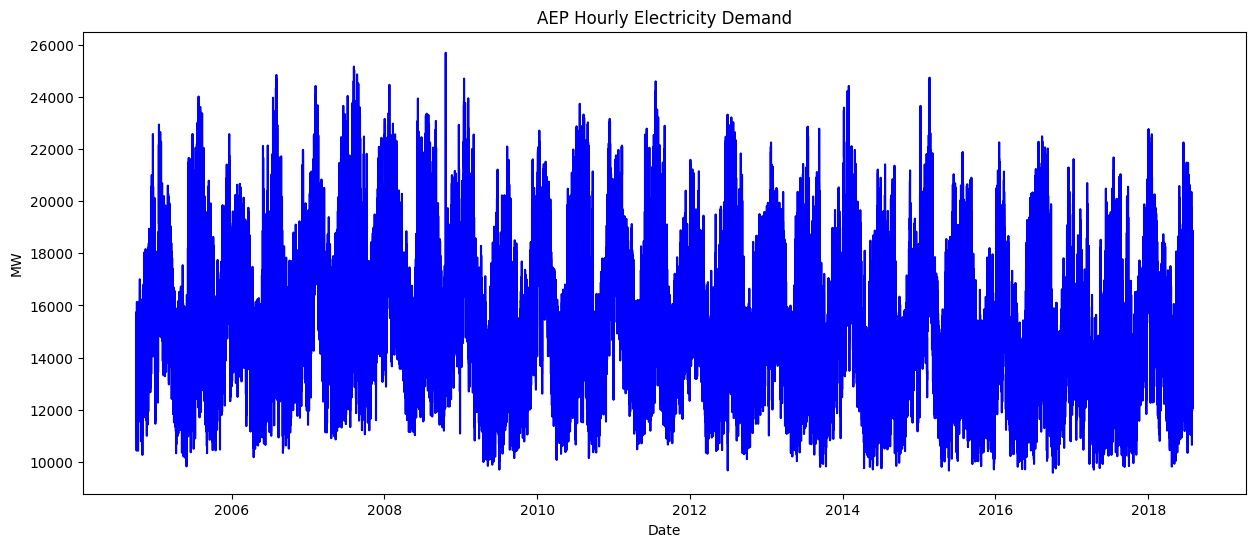

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df['Datetime'], df['AEP_MW'], color='blue')
plt.title("AEP Hourly Electricity Demand")
plt.xlabel("Date")
plt.ylabel("MW")
plt.show()


In [ ]:
missing = df.isnull().sum()
print(missing)


Datetime      0
AEP_MW        0
year          0
month         0
day           0
hour          0
dayofweek     0
is_weekend    0
dtype: int64


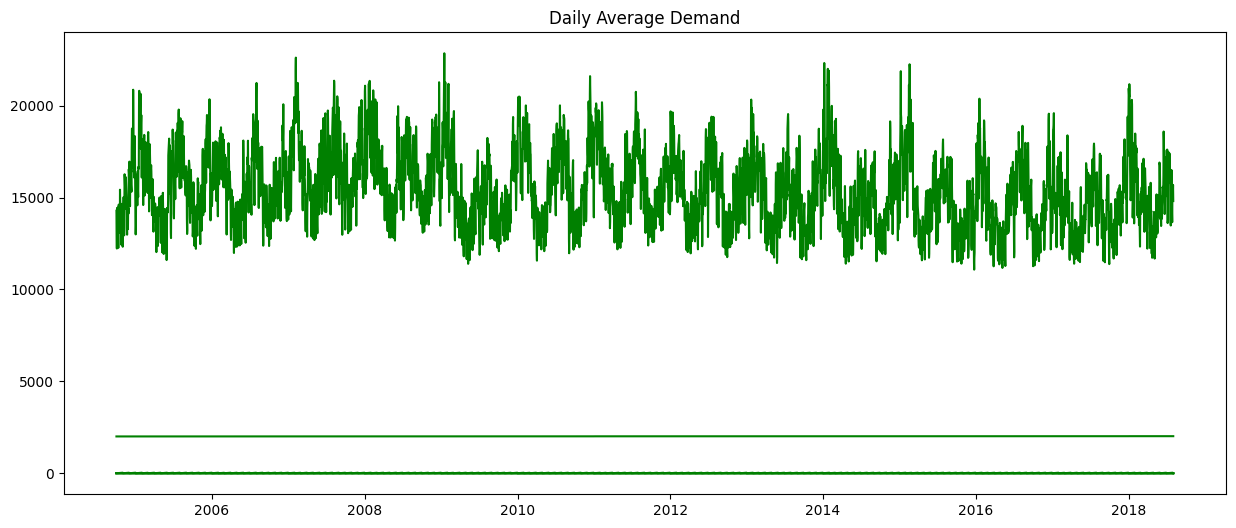

/tmp/ipython-input-3078262086.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Datetime').mean()


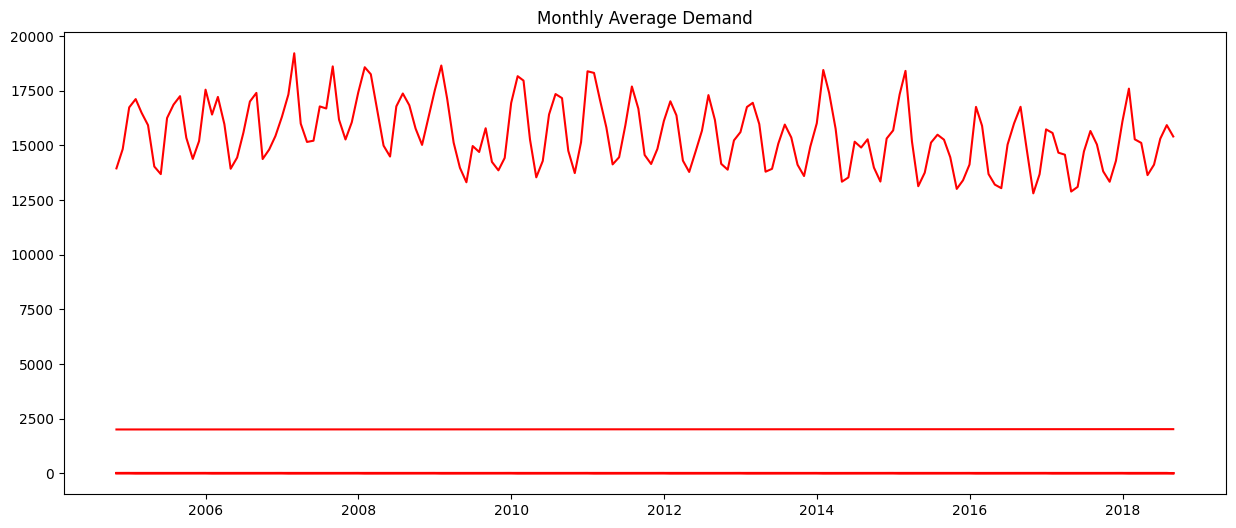

In [ ]:
# Daily average
df_daily = df.resample('D', on='Datetime').mean()

plt.figure(figsize=(15,6))
plt.plot(df_daily, color='green')
plt.title("Daily Average Demand")
plt.show()

# Monthly average
df_monthly = df.resample('M', on='Datetime').mean()

plt.figure(figsize=(15,6))
plt.plot(df_monthly, color='red')
plt.title("Monthly Average Demand")
plt.show()


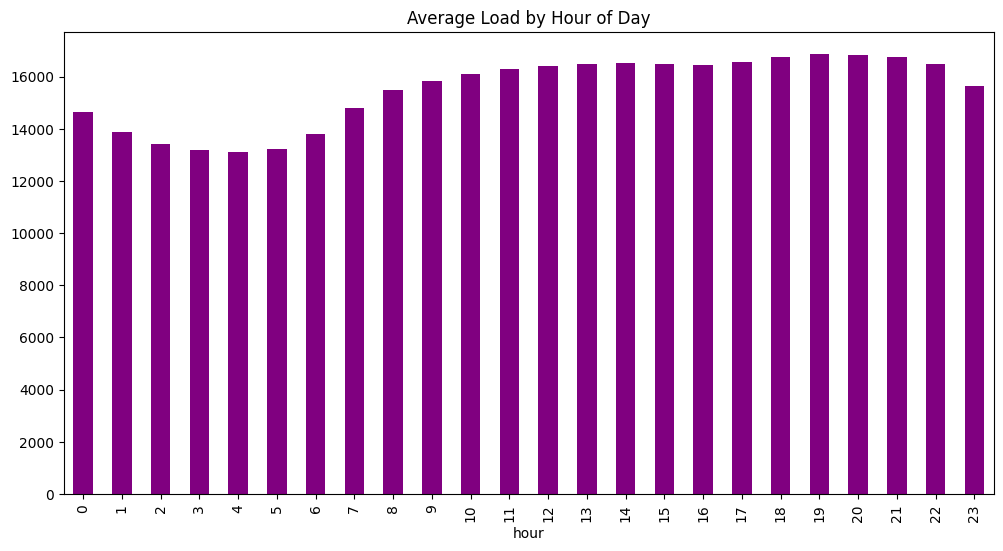

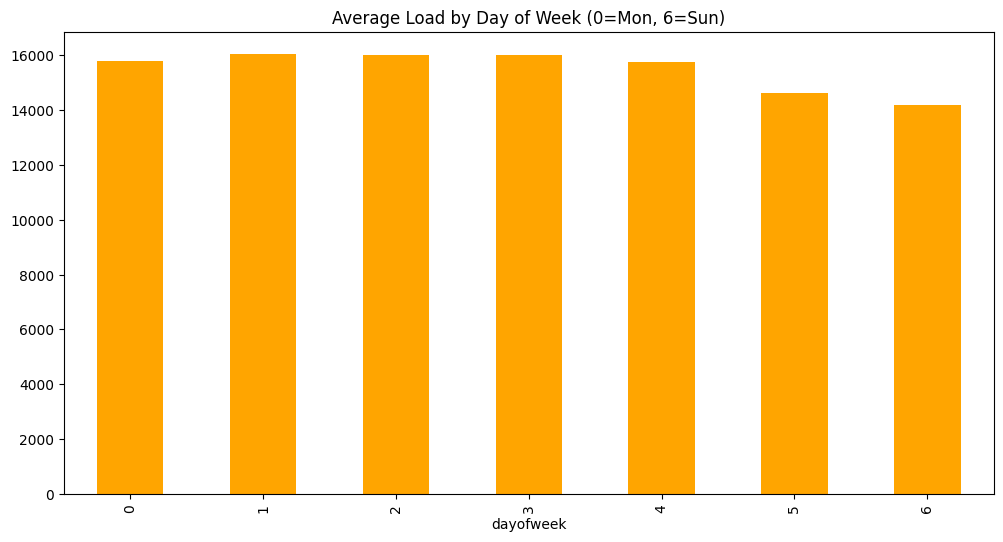

In [ ]:
# Hourly pattern
df['hour'] = df['Datetime'].dt.hour
df.groupby('hour')['AEP_MW'].mean().plot(kind='bar', figsize=(12,6), color='purple')
plt.title("Average Load by Hour of Day")
plt.show()

# Day of week pattern
df['dayofweek'] = df['Datetime'].dt.dayofweek
df.groupby('dayofweek')['AEP_MW'].mean().plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Average Load by Day of Week (0=Mon, 6=Sun)")
plt.show()


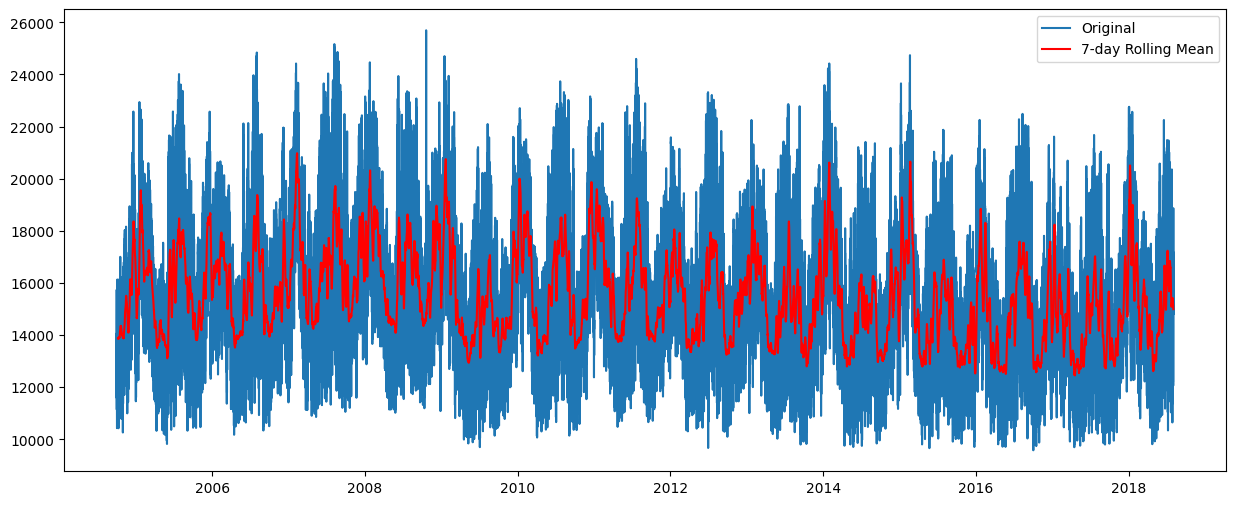

In [ ]:
# Rolling mean (7 days)
plt.figure(figsize=(15,6))
plt.plot(df['Datetime'], df['AEP_MW'], label="Original")
plt.plot(df['Datetime'], df['AEP_MW'].rolling(window=24*7).mean(), label="7-day Rolling Mean", color='red')
plt.legend()
plt.show()


# New Section